# Feature Enginnering

## Visualizing Correlation Matrix

We will compute the correlation matrix to examine the relationships between numerical variables in our dataset. This heatmap will help us identify strong correlations, both positive and negative, which can guide feature selection and engineering.



interval columns not set, guessing: ['Month_Day', 'Dep_Delay_At_Least_15_Minutes', 'Flight_Distance', 'Distance_Group']


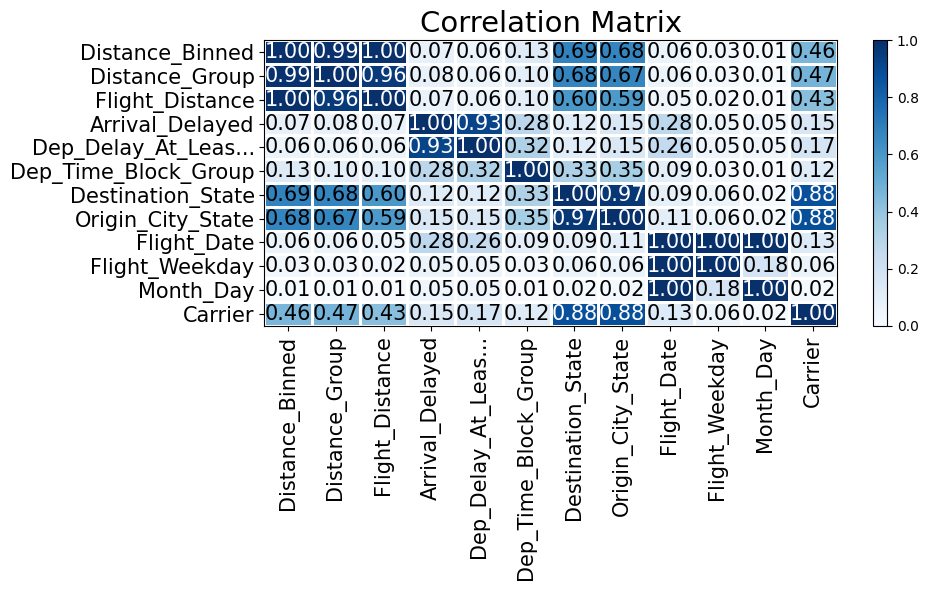

In [29]:
from operator import index
import phik
from phik.report import plot_correlation_matrix
corr_matrix = dataset.phik_matrix()
plot_correlation_matrix(corr_matrix.values,
                        x_labels = corr_matrix.columns,
                        y_labels = corr_matrix.index,
                        vmin = 0,
                        vmax = 1,
                        color_map = "Blues",
                        title = "Correlation Matrix",
                        fontsize_factor = 1.5,
                        figsize = (10,6))

In [30]:
# Select features based on correlation with 'Arrival_Delayed'
target_variable = 'Arrival_Delayed'
relevant_features = corr_matrix[target_variable][(corr_matrix[target_variable] > 0.2) | (corr_matrix[target_variable] < -0.2)].index.tolist()

print("Selected Features based on correlation with 'Arrival_Delayed':")
print(relevant_features)

Selected Features based on correlation with 'Arrival_Delayed':
['Flight_Date', 'Dep_Time_Block_Group', 'Dep_Delay_At_Least_15_Minutes', 'Arrival_Delayed']


### Selected Features based on correlation with 'Arrival_Delayed':
- Flight_Date
- Dep_Time_Block_Group
- Dep_Delay_At_Least_15_Minutes


### Define x and y Variables

In this step, we define the features (x) and the target variable (y) for our model. The features include both categorical and numerical variables that are relevant to predicting flight delays.

In [31]:
selected_features = ["Flight_Date","Dep_Time_Block_Group","Dep_Delay_At_Least_15_Minutes"]
X = dataset[selected_features]
y = dataset["Arrival_Delayed"]

In [32]:
X.head()

,Flight_Date,Dep_Time_Block_Group,Dep_Delay_At_Least_15_Minutes
0,2023-05-13,Early Morning,0
1,2023-05-22,Night,0
2,2023-05-17,Early Afternoon,0
3,2023-06-18,Afternoon,0
4,2023-06-09,Night,0


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Arrival_Delayed, dtype: object

### Encoding Categorical Variables

To prepare the dataset for modeling, we need to encode the categorical variables and scale the numerical variables. This ensures that our machine learning models can effectively learn from the data.

1. **Categorical Variables**: Dep_Time_Block_Group
    - This variable will be one-hot encoded to convert it into a numerical format suitable for model training.
    
2. **Extracting Additional Features from Flight_Date:**  To enhance our dataset with more informative features, we will convert the Flight_Date variable to datetime format and extract the year, month, and day components. This helps the model capture temporal patterns in flight delays.

In [34]:
# Define categorical and numerical features
categorical_features = ["Dep_Time_Block_Group"]
date_feature = "Flight_Date"

# Convert 'Flight_Date' to datetime and extract additional features
dataset['Flight_Date'] = pd.to_datetime(dataset['Flight_Date'])
dataset['Year'] = dataset['Flight_Date'].dt.year
dataset['Month'] = dataset['Flight_Date'].dt.month
dataset['Day'] = dataset['Flight_Date'].dt.day

# Update feature lists
numerical_features = []
numerical_features.append("Year")  # Append each feature individually
numerical_features.append("Month")
numerical_features.append("Day")

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
# Use a list to select multiple columns
X = dataset[["Year", "Month", "Day","Dep_Time_Block_Group","Dep_Delay_At_Least_15_Minutes"]]
y = dataset["Arrival_Delayed"].astype(int)

# Apply the preprocessing pipeline to X
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size= 0.1, random_state = 42)

print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2468611, 9)
x_test shape: (274291, 9)
y_train shape: (2468611,)
y_test shape: (274291,)
